## Linear Regression  
* Used for predicting a continuous dependent variable based on other independent variables  
* It finds a linear relationship between the data

https://www.kaggle.com/learn/time-series

## Linear Regression with Time Series data  
* Forecasting: forecast product demand, economic and population growth, weather  
* Time series data: observations collected over time, usually at a regular frequency  

In [1]:
# target = weight_1 * feature_1 + weight_2 * feature_2 + bias  

# Example ^ for two features
# Goal: minimise the squared error between the target and predictions <- ordinary least sqaures
# parameters, regression coefficients: weights_1, weights_2
# intercept: bias  

Time-step features:  
* Time dummy: "counts off time steps in the series from beginning to end"  
* Allow you to model "time dependence"

In [2]:
# target = weight * time + bias

Lag features:  
* Lag feature: "shift the observations fo the target series so they appear to have occured later in time."  
* Allow you to model seriel dependence: when the observation could be predicted from the previous observation.

In [3]:
# target = weight * lag + bias

### Why add time-step or lag features?  
These features can provide a model with additional information, which when used in conjunctiuon with the original data, can improve the accuracy and performance of the model. For data displaying time dependence, such as book sales over time, time-steps could be added. For data displaying seriel dependence, adding lag could help. 

## Linear Regression on Kaggle dataset

In [4]:
import kagglehub
path = kagglehub.dataset_download("thedevastator/books-sales-and-ratings")

/Users/celinelindeque/Documents/programming/python/MachineLearning/scrapbook/ml_scrapbook/Time_Series/time_series_venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import pandas as pd
booksales = pd.read_csv(path+'/Books_Data_Clean.csv')

In [6]:
import numpy as np

In [7]:
booksales.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


I want to model the relationship between sale price and publication year.

In [8]:
# drop any rows with NaN for publishing year or sale price 
booksales = booksales.dropna(subset=['Publishing Year', 'sale price'])

In [9]:
# select a subset of the data 
booksales = booksales[booksales['Publishing Year'] > 1800]
booksales = booksales[booksales['sale price'] > 10]
booksales = booksales[booksales['units sold'] > 500]

In [10]:
len(booksales)

70

In [11]:
print("The minimum number of books sold was ",np.min(booksales['units sold'])," and the median number was ",np.median(booksales['units sold']))
print("The minimum price was ",np.min(booksales['sale price'])," and the median price was ",np.median(booksales['sale price']))

The minimum number of books sold was  655  and the median number was  4380.0
The minimum price was  10.65  and the median price was  11.620000000000001


In [12]:
x__year_original  = np.array(booksales['Publishing Year'], dtype=float) 
y__price_original = np.array(booksales['sale price'],      dtype=float) 

In [13]:
# normalise data
x_mean = x__year_original.mean()
x_std  = x__year_original.std()
x__year_normalized = (x__year_original - x_mean) / x_std

y_mean = y__price_original.mean()
y_std  = y__price_original.std()
y__price_normalized = (y__price_original - y_mean) / y_std

x__year = x__year_normalized
y__price = y__price_normalized

In [14]:
x__year.shape

(70,)

In [15]:
x__year = x__year.reshape(-1, 1)
y__price = y__price.reshape(-1, 1)

In [16]:
x__year.shape 

(70, 1)

https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_linear_regression/#example

In [17]:
import torch
import torch.nn as nn

In [18]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  

    def forward(self, x):
        return self.linear(x)

In [19]:
model = LinearRegressionModel(1, 1)

criterion     = nn.MSELoss()
learning_rate = 0.001
optimizer     = torch.optim.SGD(model.parameters(), lr=learning_rate)
epochs        = 200

In [20]:
# train the linear regression model

for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = torch.from_numpy(x__year).float().requires_grad_()
    labels = torch.from_numpy(y__price).float()

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 

    # Forward to get output
    outputs = model(inputs)

    # Calculate Loss
    loss = criterion(outputs, labels)

    # Getting gradients w.r.t. parameters
    loss.backward()

    # Updating parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 1.1949506998062134
epoch 2, loss 1.1941713094711304
epoch 3, loss 1.1933953762054443
epoch 4, loss 1.192622423171997
epoch 5, loss 1.1918526887893677
epoch 6, loss 1.1910858154296875
epoch 7, loss 1.1903220415115356
epoch 8, loss 1.189561367034912
epoch 9, loss 1.1888039112091064
epoch 10, loss 1.1880491971969604
epoch 11, loss 1.1872974634170532
epoch 12, loss 1.1865489482879639
epoch 13, loss 1.1858034133911133
epoch 14, loss 1.1850608587265015
epoch 15, loss 1.1843211650848389
epoch 16, loss 1.183584451675415
epoch 17, loss 1.1828505992889404
epoch 18, loss 1.1821198463439941
epoch 19, loss 1.181391954421997
epoch 20, loss 1.1806670427322388
epoch 21, loss 1.1799449920654297
epoch 22, loss 1.1792258024215698
epoch 23, loss 1.1785094738006592
epoch 24, loss 1.1777958869934082
epoch 25, loss 1.177085280418396
epoch 26, loss 1.176377534866333
epoch 27, loss 1.1756725311279297
epoch 28, loss 1.1749705076217651
epoch 29, loss 1.1742711067199707
epoch 30, loss 1.173574566841

In [21]:
inputs.shape

torch.Size([70, 1])

Predict for all training data

In [22]:
predicted = model(torch.from_numpy(x__year).float().requires_grad_()).data.numpy()

In [23]:
import matplotlib.pyplot as plt

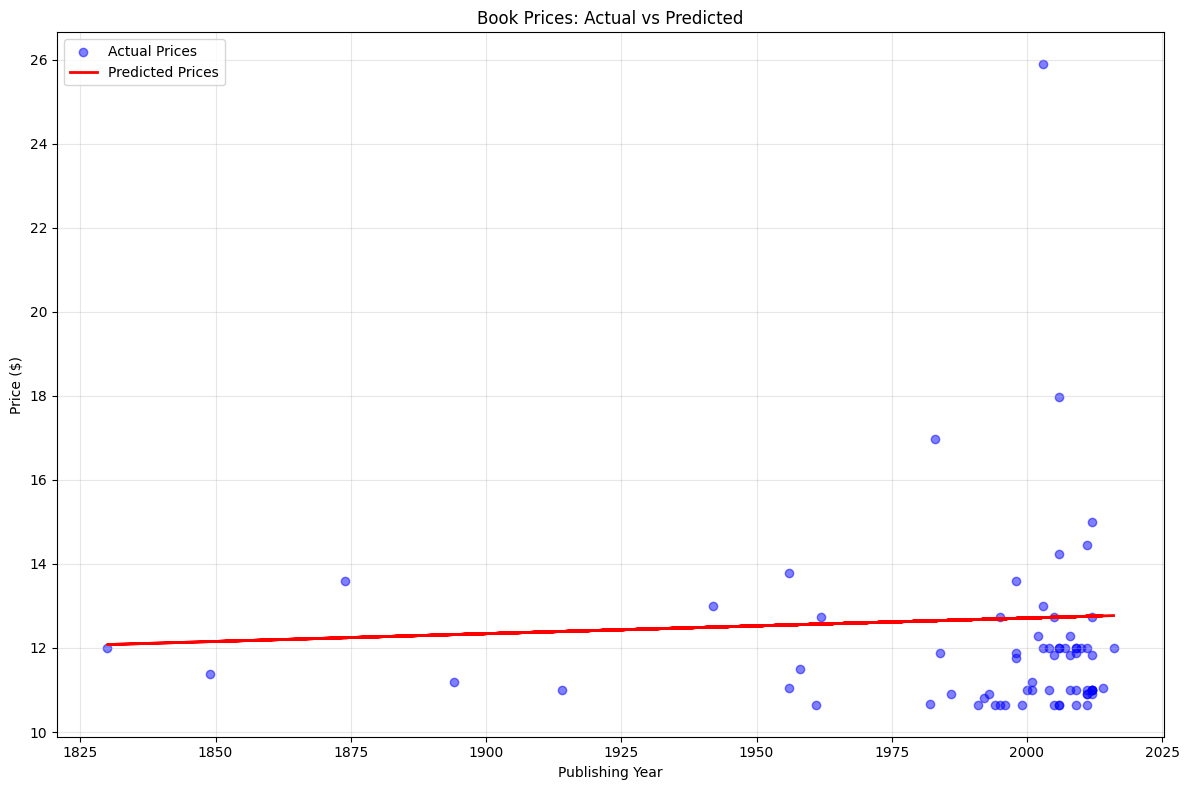

In [24]:
# Denormalize the predictions and get the original values
predicted_price_normalized = predicted.flatten()
predicted_price = (predicted_price_normalized * y_std) + y_mean
original_years  = (x__year.flatten() * x_std) + x_mean
original_prices = (y__price.flatten() * y_std) + y_mean

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(original_years, original_prices, color='blue', alpha=0.5, label='Actual Prices')
plt.plot(original_years, predicted_price, color='red', linewidth=2, label='Predicted Prices')

plt.xlabel('Publishing Year')
plt.ylabel('Price ($)')
plt.title('Book Prices: Actual vs Predicted')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Performing linear regression between other values may return more interesting and insightful results. The data is clearly scewed towards the present-day when more books are being published. You could not fairly say "the prices of books which sold over 500 copies has increased over time" with such uneven data.